# Fan In Fan Out Pre-Scan Piloting
---

## Table of Contents

<a href='#motivation'>
- Motivation

<a href='#design'>
- Design

<a href='#pilot1'>
- Pilot 1

<a href='#pilot2'>
- Pilot 2

<a href='#pilot3'>
- Pilot 3

<a href='#fmri_design'>
- fMRI Design
    
---

<a id="motivation"></a>
### Motivation

- Separate prior studies have found that humans compute action values by:
    - 1) prospective (forward) simuluation at choice time
    - 2) retrospective (backward) reactivation at encoding time
- It is unclear when each of these strategies is used. One idea is that assocations in memory may compete to inform decisions, such that the presence of multiple decision-relevant candidate associations prevents backward replay in favor of forward simulation at decision-time. The converse is that the presence of fewer decision-relevant associations in memory will favor backward replay.
- To test this idea, an experiment was designed where in one condition multiple associations "fan in" to a common state, while in another a single association "fans out" to multiple states. **Backward replay should be favored for stimuli that fan out, while forward simulation should be favored for stimuli that fan in**


<img src="fifo_design_fig.png" width="400">


 

- Specifically, this experiment extends previous work on sensory preconditioning, and **we predict that the presence of multiple antecedents in the forward condition will lead to less replay during reward learning and greater forward simulation during the decision phase. The presence of a single antecedent in the backward condition will lead to greater replay during reward learning and less forward simulation during the decision phase.**


---

<a id="design"></a>
### Initial Design

The task was programmed in PsychoPy following the specifications reported for sensory preconditioning in Wimmer & Shohamy, 2012. Neutrally rated face images were chosen from the Chicago Face Database and were matched to Columbia undergraduate demographics (race/gender). Scenes were chosen from Konkle, Brady, Alvarez, & Oliva, 2012 (Psych Science). Objects were chosen from Brady, Konkle, Alvarez, & Oliva, 2008 (PNAS).

The experiment consisted of the following procedure:

- **Image rating** (50 faces, 50 scenes, 50 objects) on a continuous "liking" scale. The most neutral images are then chosen to be presented in the task. Time: 10 minutes
- **Conditioning phase.** Trials: 160 total; 10/pair with 16 pairs. Time: 25 minutes
- **Reward learning phase.** Trials: 160 total; 20/pair with 8 pairs. Time: 30 minutes
- **Decision phase.** Trials: 96 total; 4/image combination. Time: 20 minutes
- **Memory and post-liking assessment.** Time: 5 minutes

Total Time: 90 minutes

#### Changes from Wimmer & Shohamy, 2012:

- Instead of detecting upside images during the conditioning phase, we opted to have participants indicate the category of the image in order to bring greater attention to the category distinction (greater localization potential)
- FIFO has two trial types (fan in; fan out). In order to have multiple A->C pairs/type, there are 16 pairs in total (2/category/type)
- There is no visual distinction between A and C images beyond the category (whereas in Wimmer & Shohamy the C images were all circular fractals)
- All phases are longer due to having multiple trial types


In [8]:
%matplotlib inline
from __future__ import division
import warnings, os
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

<a id="pilot1"></a>
## Pilot 1: SONA participants

In [9]:
pids = range(1,8)
sonaData1 = getChoiceData(mainData=pd.read_csv(os.path.join(expPath,"fullDataSONA1.csv")),
                           dSet="SONA1")
pids = ["008","009","010","011","013",
        "014","015","016","017"]
sonaData2 = getChoiceData(mainData=loadData(dType="main"))
choiceData = pd.concat([sonaData1,sonaData2])

In [10]:
print("N = %s"%len(choiceData.pid.unique()))

N = 16


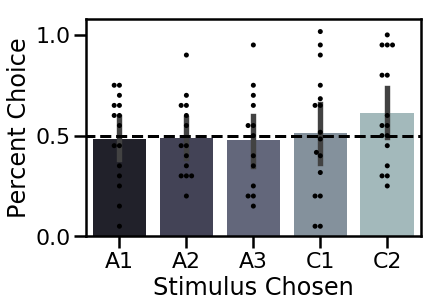

In [11]:
choiceData2Plot = choiceData[choiceData.stim_chosen.isin(["A1","A2","A3","C1","C2"])]
f = sns.barplot(x="stim_chosen",y="counts",data=choiceData2Plot,palette=sns.color_palette("bone"))
sns.swarmplot(x="stim_chosen",y="counts",data=choiceData2Plot,color='k')
f.axes.set_xlabel("Stimulus Chosen")
f.axes.set_ylabel("Percent Choice")
plt.plot((-1,5),(0.5,0.5),'k--');

Participants did not reliability learn the conditioned stimuli. Data quality for this pilot was relatively low (subject pool participants did not show high levels of engagement with the task)

Several changes were made following this SONA pilot:

- Paid participants were used instead of SONA participants
- The probability of receiving reward was changed from 80% to 100%
- Conditioning trials were increased from 20 to 25
- Rather than having participants rate images, we pre-selected "neutral" and discriminable images:
    - 8 neutral faces (matching Columbia demographics) were selected at random
    - 8 scenes that tended to be rated the most neutral by participants were selected
    - 8 neutrally rated and more discriminable objects were chosen from the Open Affective Standardized Image Set (OASIS)

---

<a id="pilot2"></a>
## Pilot 2: Conditioning Only

We first wanted to see if the chosen stimuli were easily learnable, so we ran just the conditioning phase on a few participants in person

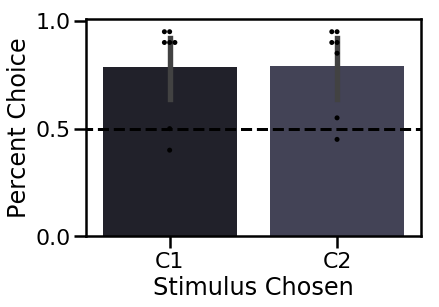

In [12]:
# conditioning only
pids = ["200","201","202","203","204","205","206"]
choiceData = getChoiceData(mainData=loadData(dType="main"))

choiceData2Plot = choiceData[choiceData.stim_chosen.isin(["C1","C2"])]
f = sns.barplot(x="stim_chosen",y="counts",data=choiceData2Plot,palette=sns.color_palette("bone"))
sns.swarmplot(x="stim_chosen",y="counts",data=choiceData2Plot,color='k')
f.axes.set_xlabel("Stimulus Chosen")
f.axes.set_ylabel("Percent Choice")
plt.plot((-1,5),(0.5,0.5),'k--');

Participants are able to learn that these stimuli are associated with reward.

---

<a id="pilot3"></a>
## Pilot 3: Paid participants

In [13]:
pids = ["300","301","302","303","304","305",
        "306","307","308","309","310","318",
        "312","313","314","315","316","317"]

choiceData = getChoiceData(mainData=loadData(dType="main"))

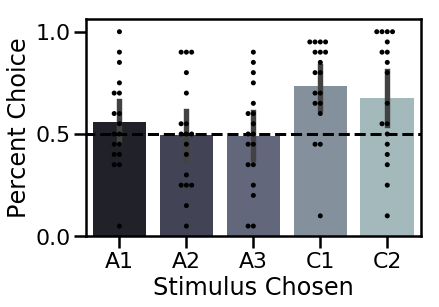

In [14]:
choiceData2Plot = choiceData[choiceData.stim_chosen.isin(["A1","A2","A3","C1","C2"])]
f = sns.barplot(x="stim_chosen",y="counts",data=choiceData2Plot,palette=sns.color_palette("bone"))
sns.swarmplot(x="stim_chosen",y="counts",data=choiceData2Plot,color='k')
f.axes.set_xlabel("Stimulus Chosen")
f.axes.set_ylabel("Percent Choice")
plt.plot((-1,5),(0.5,0.5),'k--');

Participants learn the conditioned stimuli, although at a rate slightly lower than previous work. Performance for preconditioned stimuli is at chance at the group level.

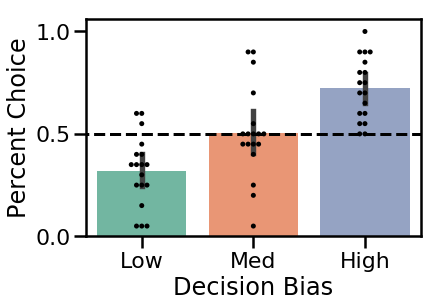

In [15]:
precondData = getPrecondData()
f = sns.barplot(x="within_subject_decision_bias",y="counts",
                data=precondData,palette=sns.color_palette("Set2"))
sns.swarmplot(x="within_subject_decision_bias",y="counts",data=precondData,color='k')
f.axes.set_xlabel("Decision Bias")
f.axes.set_ylabel("Percent Choice")
plt.plot((-1,3),(0.5,0.5),'k--');

Splitting stimuli by ranking each preconditioned stimulus category according to within-subject decision bias (as in Wimmer & Shohamy, 2012) shows similar results to that paper

---
<a id="fmri_design"></a>
### fMRI Design
- Stimulus presentation timing is identical to Wimmer and Shohamy, 2012 (optimized for event-related)
<img src="fifo_scan_design.png">


In [7]:
global expPath
global pids

expPath = "/Users/jonathan/shohamylab/fwdbwd/"

def loadData(dType=None,dataDir="data",fileType="stateData"):
    '''
    
    Load individual participant data into aggregated dataframe
    
    '''
    
    data = []
    for pid in pids:
        pidPath = os.path.join(expPath,dataDir,pid)
        dataFile = [d for d in os.listdir(pidPath) if dType in d and fileType in d][0]
        subData = pd.read_csv(os.path.join(pidPath,dataFile))
        subData["pid"] = [pid] * len(subData)
        data.append(subData)
    data = pd.concat(data,ignore_index=True)
    
    return data

def getChoiceData(mainData=None,dSet=None):
    '''
    
    Get participant performance during the decision phase
    
    '''
    
    categoryIDs = mainData.groupby(["pid","stimulus1","category1"]).size().reset_index(name="counts")

    choiceData = mainData[mainData.stateName == "choice_phase3"]

    def chosen(row):
        if row["stimulus_position1"] == "(-0.5, 0)":
            if row["key_pressed"] == 1:
                return row["category1"]
            else:
                return row["category2"]
        elif row["stimulus_position1"] == "(0.5, 0)":
            if row["key_pressed"] == 2:
                return row["category1"]
            else:
                return row["category2"]

    choiceData['stim_chosen'] = choiceData.apply(chosen, axis=1)

    # Clean the data
    choiceData = choiceData[pd.notnull(choiceData.key_pressed)]

    plotChoiceDf = choiceData.groupby(["pid","category1","category2","stim_chosen"])\
                             .size() \
                             .reset_index(name='counts')

    plotChoiceDf["choice"] = plotChoiceDf["category1"]+"_v_"+plotChoiceDf["category2"]

    plotChoiceDf.counts = plotChoiceDf.counts.astype(float)
    for i_row, row in plotChoiceDf.iterrows():

        if row.choice == "C1_v_C4" and dSet == "SONA1":
            numShown = 60
        else:
            numShown = 20

        plotChoiceDf.at[i_row,"counts"] = row.counts/numShown
        
    return plotChoiceDf

def getPrecondData():
    
    precondData = choiceData[(choiceData.choice.isin(["A1_v_A4","A2_v_A5","A3_v_A6"])) & \
                         (choiceData.stim_chosen.isin(["A1","A2","A3"]))]
    outData = []
    for pid in precondData.pid.unique():
        pidData = precondData[precondData.pid == pid]
        pidData = pidData.sort_values("counts")
        pidData['within_subject_decision_bias'] = ["Low","Med","High"]
        outData.append(pidData)
    precondData = pd.concat(outData)
    
    return precondData